<a href="https://colab.research.google.com/github/Pramod1902/Application-of-Data-Mining/blob/main/SimpleRegression(Assignment_07).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
data=pd.read_csv("/content/SLR_Salary_dataset.csv")
print(data)

    Unnamed: 0  YearsExperience    Salary
0            0              1.2   39344.0
1            1              1.4   46206.0
2            2              1.6   37732.0
3            3              2.1   43526.0
4            4              2.3   39892.0
5            5              3.0   56643.0
6            6              3.1   60151.0
7            7              3.3   54446.0
8            8              3.3   64446.0
9            9              3.8   57190.0
10          10              4.0   63219.0
11          11              4.1   55795.0
12          12              4.1   56958.0
13          13              4.2   57082.0
14          14              4.6   61112.0
15          15              5.0   67939.0
16          16              5.2   66030.0
17          17              5.4   83089.0
18          18              6.0   81364.0
19          19              6.1   93941.0
20          20              6.9   91739.0
21          21              7.2   98274.0
22          22              8.0  1

In [21]:
data = data.drop('Unnamed: 0', axis=1)

In [22]:
print("Null Values in Dataset:")
print(data.isnull().sum())

Null Values in Dataset:
YearsExperience    0
Salary             0
dtype: int64


In [23]:
print("\nMean:")
print(data.mean())
print("\nMedian:")
print(data.median())
print("\nMode:")
print(data.mode().iloc[0])


Mean:
YearsExperience        5.413333
Salary             76004.000000
dtype: float64

Median:
YearsExperience        4.8
Salary             65238.0
dtype: float64

Mode:
YearsExperience        3.3
Salary             37732.0
Name: 0, dtype: float64


In [24]:
X = data['YearsExperience']
y = data['Salary']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

In [26]:
X_train_sm = sm.add_constant(X_train)

In [28]:
lr = sm.OLS(y_train, X_train_sm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     430.7
Date:                Mon, 17 Mar 2025   Prob (F-statistic):           6.14e-16
Time:                        08:14:29   Log-Likelihood:                -241.95
No. Observations:                  24   AIC:                             487.9
Df Residuals:                      22   BIC:                             490.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.588e+04   2691.427     

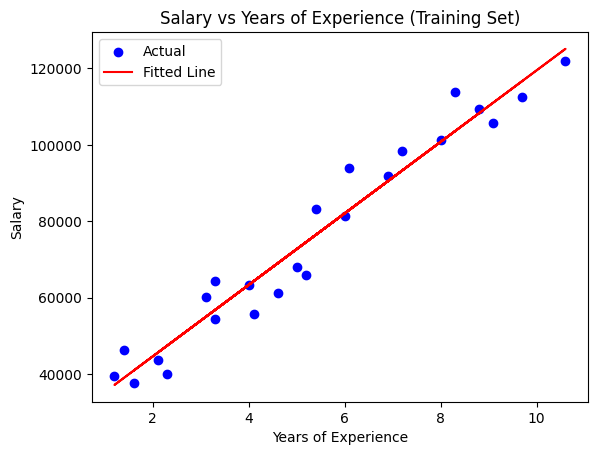

In [29]:
plt.scatter(X_train, y_train, color='blue', label='Actual')
plt.plot(X_train, lr.predict(X_train_sm), color='red', label='Fitted Line')
plt.title('Salary vs Years of Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [30]:
X_test_sm = sm.add_constant(X_test)
y_pred = lr.predict(X_test_sm)

In [31]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)

In [32]:
n = X_test.shape[0]
p = 1  # Number of predictors
adjusted_r_squared = 1 - (1-r_squared) * (n-1) / (n-p-1)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r_squared)
print("Adjusted R-squared:", adjusted_r_squared)

MSE: 24477109.089655835
RMSE: 4947.434596804271
R-squared: 0.9720725422361337
Adjusted R-squared: 0.9650906777951671
